In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as c
from scipy.integrate import quad

In [2]:
P_std = 101325
T_15C = 288.15
e_charge = 1.602e-19
mu_air = 1.00000037*c.mu0.value

In [3]:
# This is to provide some weak dependence of n on lambda.
# This has a modest but appreciable impact in the Frank-Tamm equation due to the factor (1 - 1 / (beta * n))**2)
# Still regard lambda as being photon wavelength in vacuum; lambda = c / nu

def n_air(lam, P=P_std, T=T_15C):
    
    return 1 + 7.76e-7 * (1 + 7.52e-15 / lam**2) * P/T

In [4]:
def d2Edxdlam(lam, beta, q=e_charge, mu=mu_air):

    return np.pi * q**2 * mu * (c.c.value**2 / lam**3) * (1 - 1 / (beta * n_air(lam))**2)

In [5]:
def d2Ndxdlam(lam, beta, q=e_charge, mu=mu_air):

    return np.pi * q**2 * mu / c.h.value * (c.c.value / lam**2) * (1 - 1 / (beta * n_air(lam))**2)

In [6]:
def dEdx(lam_low, lam_high, beta, q=e_charge, mu=mu_air):

    return quad(d2Edxdlam, lam_low, lam_high, args=(beta, q, mu))[0]

In [7]:
def dNdx(lam_low, lam_high, beta, q=e_charge, mu=mu_air):

    return quad(d2Ndxdlam, lam_low, lam_high, args=(beta, q, mu))[0]

In [8]:
def get_beta(E, m=c.m_e.value):

    return np.sqrt(1 - m**2 * c.c.value**4 / E**2)

In [9]:
# Minimum muon energy (in GeV) to emit Cherenkov radiation in air
(1 - 1.0003**-2)**-0.5 * 1.8835e-28 * c.c.value**2 * u.J.to(u.GeV)

4.314383145048441

In [10]:
# # Shower energy drop

# E = 1  # starting gamma energy in TeV

# E /= 2
# bet = get_beta(E * u.TeV.to(u.J))

# n = 1
# while bet > 1/1.0003:
#     print(n, '--', E, 'TeV: beta =', bet)
#     n += 1
#     E /= 2
#     bet = get_beta(E * u.TeV.to(u.J))

In [11]:
PMT_min = 185e-9
PMT_max = 650e-9

blue_UV = 380e-9
UVB_UVC = 280e-9

In [12]:
lams = np.linspace(PMT_min, PMT_max, 10000)

In [13]:
beta = get_beta(E=1 * u.TeV.to(u.J), m=1.8835e-28)  # 1-TeV muon

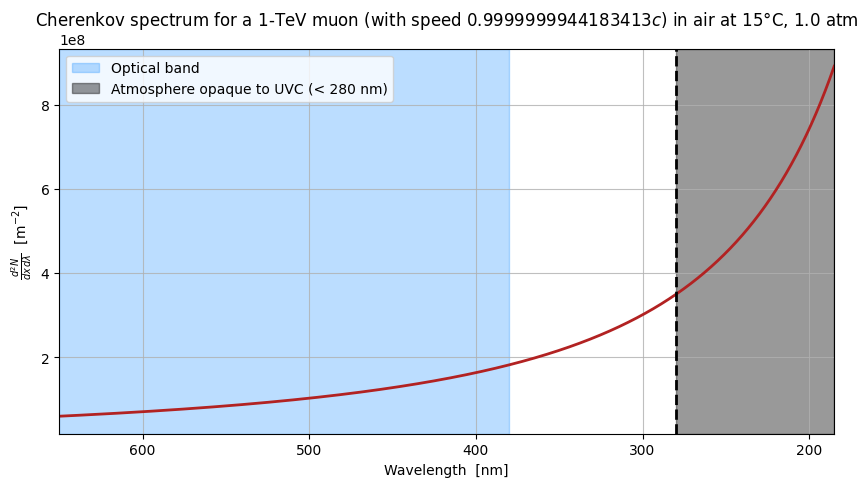

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(lams, d2Ndxdlam(lams, beta), c='firebrick', lw=2)
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

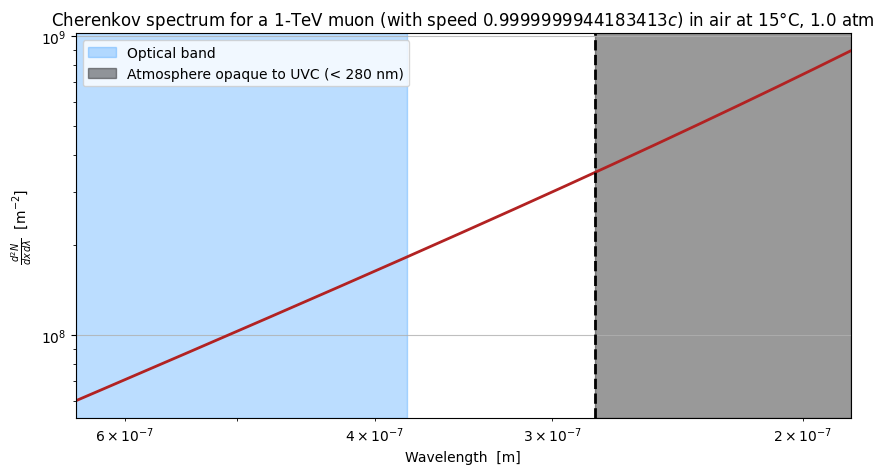

In [15]:
fig = plt.figure(figsize=(10, 5))

plt.plot(lams, d2Ndxdlam(lams, beta), c='firebrick', lw=2)
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

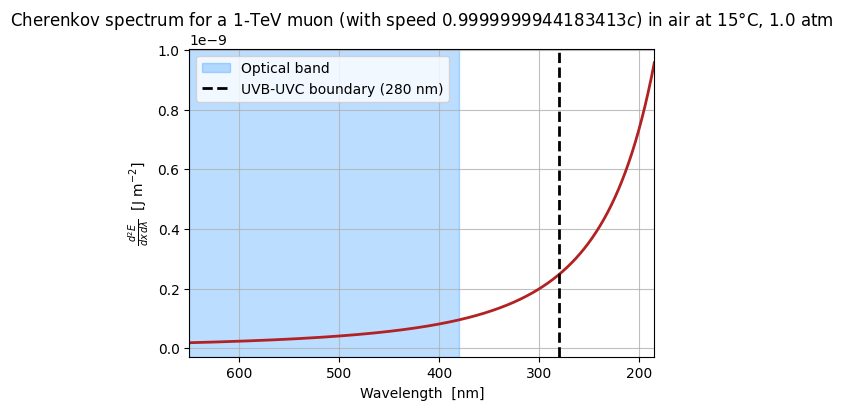

In [16]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.plot(lams, d2Edxdlam(lams, beta), c='firebrick', lw=2)
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

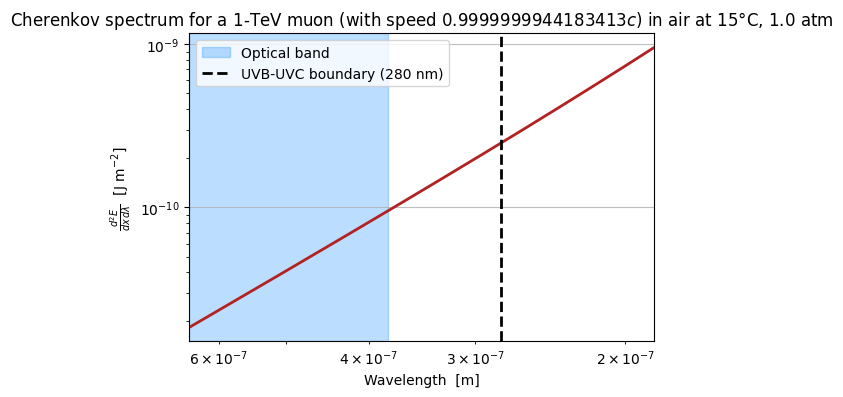

In [17]:
fig = plt.figure(figsize=(6, 4))

plt.plot(lams, d2Edxdlam(lams, beta), c='firebrick', lw=2)
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

In [18]:
total_N = dNdx(UVB_UVC, PMT_max, beta)
print('Number of Cherenkov photons emitted per meter by a muon travelling through air\nwith speed '
      + str(beta) + 'c and detectable by PMTs:', total_N)

Number of Cherenkov photons emitted per meter by a muon travelling through air
with speed 0.9999999944183413c and detectable by PMTs: 53.46348116766637


In [19]:
# This is an estimate

refraction_limit = c.c.value / 1.1e15 / n_air(c.c.value / 1.1e15)
long_wavelength = 1e-5  # i.e., 10 microns; otherwise the math gets weird

total_E = dEdx(refraction_limit, long_wavelength, beta)
print('Total energy radiated per meter by a muon travelling through air with speed '
      + str(beta) + 'c:', total_E, 'J')

Total energy radiated per meter by a muon travelling through air with speed 0.9999999944183413c: 3.512769499746626e-17 J


In [20]:
energies = np.array([4.5, 5, 6, 10, 100, 1000])  # GeV
betas = get_beta(E=energies * u.GeV.to(u.J), m=1.8835e-28)  # muons
betas

array([0.99972432, 0.99977671, 0.99984494, 0.99994418, 0.99999944,
       0.99999999])

In [21]:
(1 - betas[-2]**2)**-0.5

946.462395297162

In [22]:
clrs = ['firebrick', 'gold', 'royalblue', 'blueviolet', 'fuchsia']

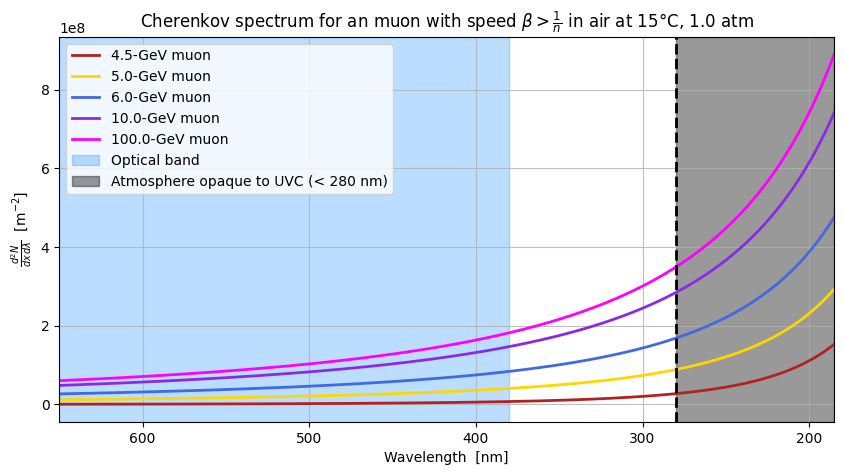

In [23]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, b in enumerate(betas[:-1]):
    plt.plot(lams, d2Ndxdlam(lams, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

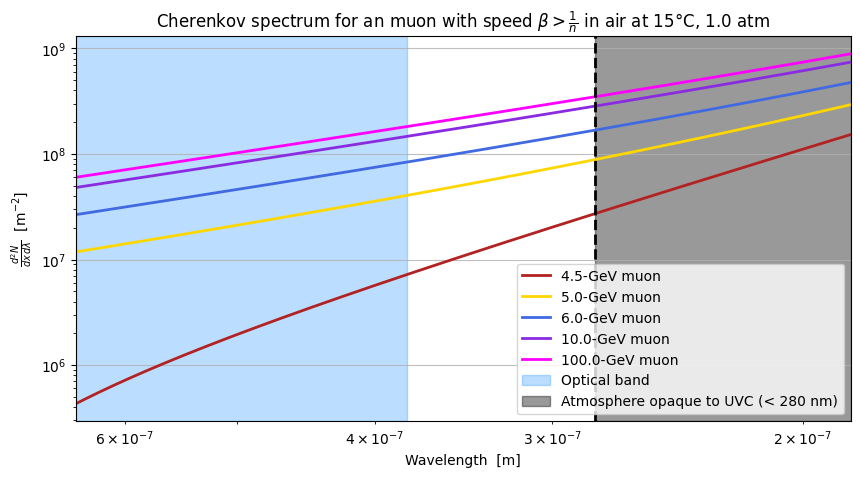

In [24]:
fig = plt.figure(figsize=(10, 5))

for i, b in enumerate(betas[:-1]):
    plt.plot(lams, d2Ndxdlam(lams, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

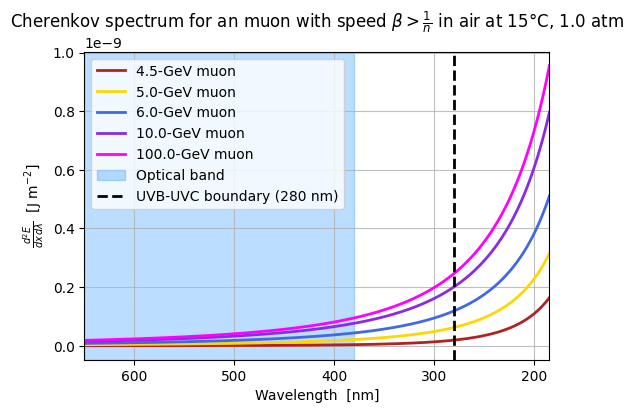

In [25]:
fig, ax = plt.subplots(figsize=(6, 4))

for i, b in enumerate(betas[:-1]):
    plt.plot(lams, d2Edxdlam(lams, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

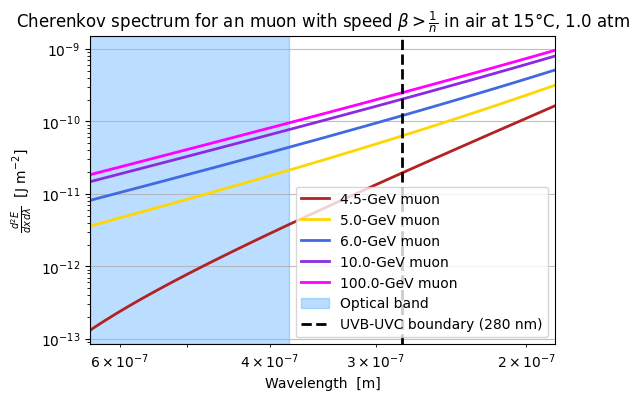

In [26]:
fig = plt.figure(figsize=(6, 4))

for i, b in enumerate(betas[:-1]):
    plt.plot(lams, d2Edxdlam(lams, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

In [27]:
def d2Edxdlam_MM(lam, beta, mu=mu_air):

    return np.pi * e_charge**2 * mu * (c.c.value**2 / lam**3) \
    * (1 - 1 / (beta * n_air(lam))**2) * (n_air(lam) / (2 * c.alpha)) ** 2

In [28]:
def d2Ndxdlam_MM(lam, beta, mu=mu_air):

    return np.pi * e_charge**2 * mu / c.h.value * (c.c.value / lam**2) \
    * (1 - 1 / (beta * n_air(lam))**2) * (n_air(lam) / (2 * c.alpha)) ** 2

In [29]:
def dEdx_MM(lam_low, lam_high, beta, mu=mu_air):

    return quad(d2Edxdlam_MM, lam_low, lam_high, args=(beta, mu))[0]

In [30]:
def dNdx_MM(lam_low, lam_high, beta, mu=mu_air):

    return quad(d2Ndxdlam_MM, lam_low, lam_high, args=(beta, mu))[0]

In [31]:
gamma = (1 - 1.0003**-2)**-0.5
gamma

40.8340140588854

In [32]:
# pick gamma = 1e3
# e.g. MM with mass 1e5 GeV, requires E = 1e8 GeV
# MM with mass 1e8 GeV, requires E = 1e11 GeV, etc.

In [33]:
beta_MM = get_beta(E=1e11 * u.GeV.to(u.J), m=(1e8 * c.c**-2 *u.GeV).to(u.kg).value) 
beta_MM

0.999999499999875

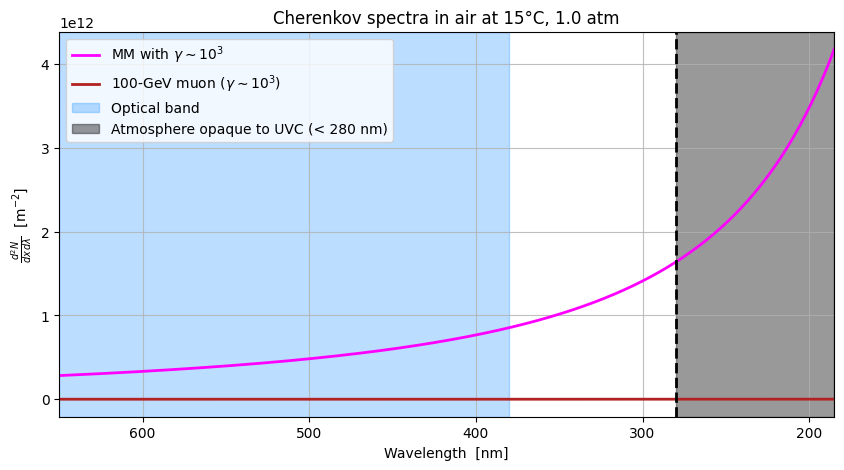

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(lams, d2Ndxdlam_MM(lams, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
plt.plot(lams, d2Ndxdlam(lams, betas[-2]), c='firebrick', lw=2, label=r'100-GeV muon ($\gamma \sim 10^3$)')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title('Cherenkov spectra in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

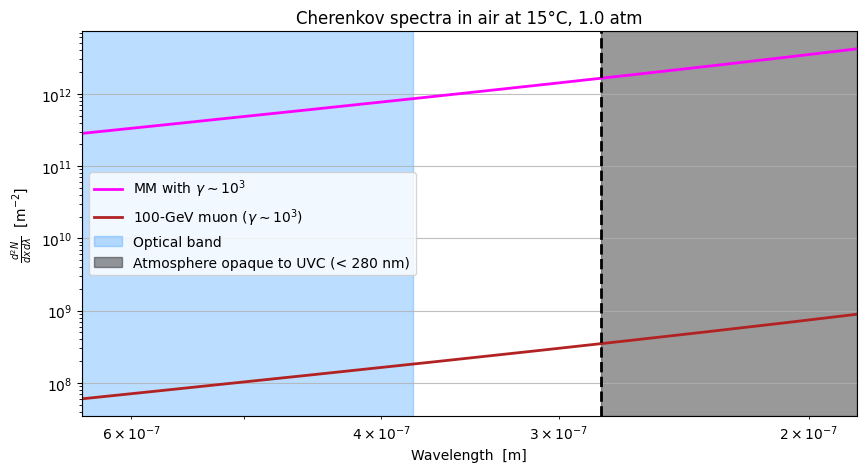

In [35]:
plt.figure(figsize=(10, 5))

plt.plot(lams, d2Ndxdlam_MM(lams, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
plt.plot(lams, d2Ndxdlam(lams, betas[-2]), c='firebrick', lw=2, label=r'100-GeV muon ($\gamma \sim 10^3$)')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvspan(PMT_min, UVB_UVC, color='black', alpha=0.4, label='Atmosphere opaque to UVC (< 280 nm)')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2)

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\lambda}$  [m$^{-2}$]')
plt.title('Cherenkov spectra in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

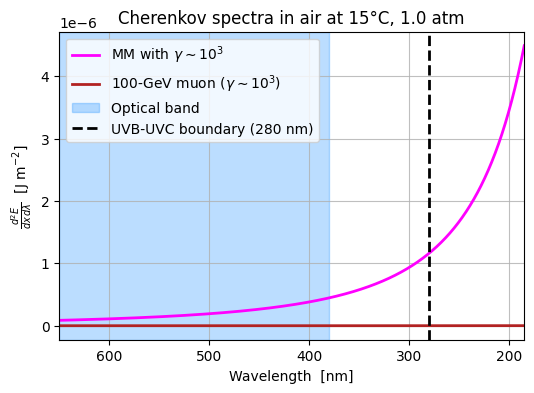

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))

plt.plot(lams, d2Edxdlam_MM(lams, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
plt.plot(lams, d2Edxdlam(lams, betas[-2]), c='firebrick', lw=2, label=r'100-GeV muon ($\gamma \sim 10^3$)')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [nm]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title('Cherenkov spectra in air at 15°C, 1.0 atm')

ticks = ax.xaxis.axes.get_xticks()
ticks_nm = [int(tick * 1e9) for tick in ticks]
plt.xticks(ticks=ticks, labels=ticks_nm)

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

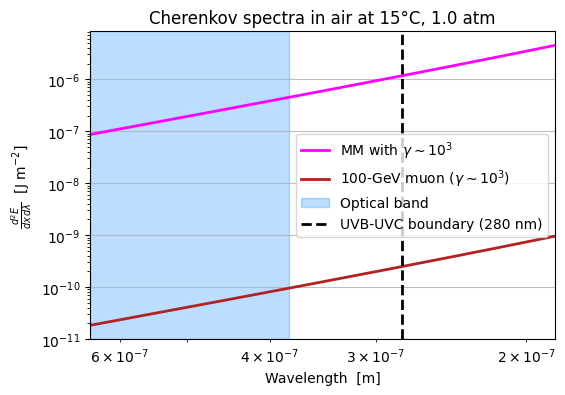

In [37]:
plt.figure(figsize=(6, 4))

plt.plot(lams, d2Edxdlam_MM(lams, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
plt.plot(lams, d2Edxdlam(lams, betas[-2]), c='firebrick', lw=2, label=r'100-GeV muon ($\gamma \sim 10^3$)')
plt.axvspan(blue_UV, PMT_max, color='dodgerblue', alpha=0.3, label='Optical band')
plt.axvline(x=UVB_UVC, color='black', ls='--', lw=2, label='UVB-UVC boundary (280 nm)')

plt.grid(alpha=0.8)
plt.xlabel('Wavelength  [m]')
plt.ylabel(r'$\frac{d^2E}{dx\,d\lambda}$  [J m$^{-2}$]')
plt.title('Cherenkov spectra in air at 15°C, 1.0 atm')

plt.xscale('log')
plt.yscale('log')

# plt.xlim(PMT_min, PMT_max)
plt.xlim(PMT_max, PMT_min)

plt.legend()
plt.show()

In [38]:
total_N = dNdx(UVB_UVC, PMT_max, betas[-2]) / 100
print('Number of Cherenkov photons emitted per cm by a muon travelling through air\nwith speed '
      + str(betas[-2]) + 'c and detectable by PMTs:', total_N)

total_N_MM = dNdx_MM(UVB_UVC, PMT_max, beta_MM) / 100
print('\nNumber of Cherenkov photons emitted per cm by a magnetic monopole travelling through air\nwith speed '
      + str(beta_MM) + 'c and detectable by PMTs:', total_N_MM)

Number of Cherenkov photons emitted per cm by a muon travelling through air
with speed 0.9999994418339737c and detectable by PMTs: 0.5336054697524241

Number of Cherenkov photons emitted per cm by a magnetic monopole travelling through air
with speed 0.999999499999875c and detectable by PMTs: 2507.0739301062363


In [39]:
total_N_MM / total_N

4698.366250386149

In [40]:
total_E = dEdx(refraction_limit, long_wavelength, betas[-2]) / 100 * u.J.to(u.eV)
print('Total energy radiated per cm by a muon travelling through air with speed '
      + str(betas[-2]) + 'c:', total_E, 'eV')

total_E_MM = dEdx_MM(refraction_limit, long_wavelength, beta_MM) / 100 * u.J.to(u.eV)
print('Total energy radiated per cm by a magnetic monopole travelling through air with speed '
      + str(beta_MM) + 'c:', total_E_MM / 1e3, 'keV')

Total energy radiated per cm by a muon travelling through air with speed 0.9999994418339737c: 2.188273047589064 eV
Total energy radiated per cm by a magnetic monopole travelling through air with speed 0.999999499999875c: 10.281306485610212 keV


In [41]:
total_E_MM / total_E

4698.365451668689